In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")


fire_data=pd.read_csv("amazon.csv", sep=',', encoding = "cp1252", parse_dates=True)

print(len(fire_data))
fire_data.head(10)

6454


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [2]:
fire_data.loc[fire_data['month'] == 'Janeiro','month']='January'
fire_data.loc[fire_data['month'] == 'Fevereiro','month']='February'
fire_data.loc[fire_data['month'] == 'Março','month']='March'
fire_data.loc[fire_data['month'] == 'Abril','month']='April'
fire_data.loc[fire_data['month'] == 'Maio','month']='May'
fire_data.loc[fire_data['month'] == 'Junho','month']='June'
fire_data.loc[fire_data['month'] == 'Julho','month']='July'
fire_data.loc[fire_data['month'] == 'Agosto','month']='August'
fire_data.loc[fire_data['month'] == 'Setembro','month']='September'
fire_data.loc[fire_data['month'] == 'Outubro','month']='October'
fire_data.loc[fire_data['month'] == 'Novembro','month']='November'
fire_data.loc[fire_data['month'] == 'Dezembro','month']='December'

In [3]:
fire_data2=fire_data.loc[(fire_data['year'] == 1998)&(fire_data['month'] == 'July')]

fire_data2.head()

,year,state,month,number,date
120,1998,Acre,July,37.0,1998-01-01
360,1998,Alagoas,July,0.0,1998-01-01
599,1998,Amapa,July,0.0,1998-01-01
838,1998,Amazonas,July,71.0,1998-01-01
1077,1998,Bahia,July,219.0,1998-01-01


Text(0, 0.5, 'Number')

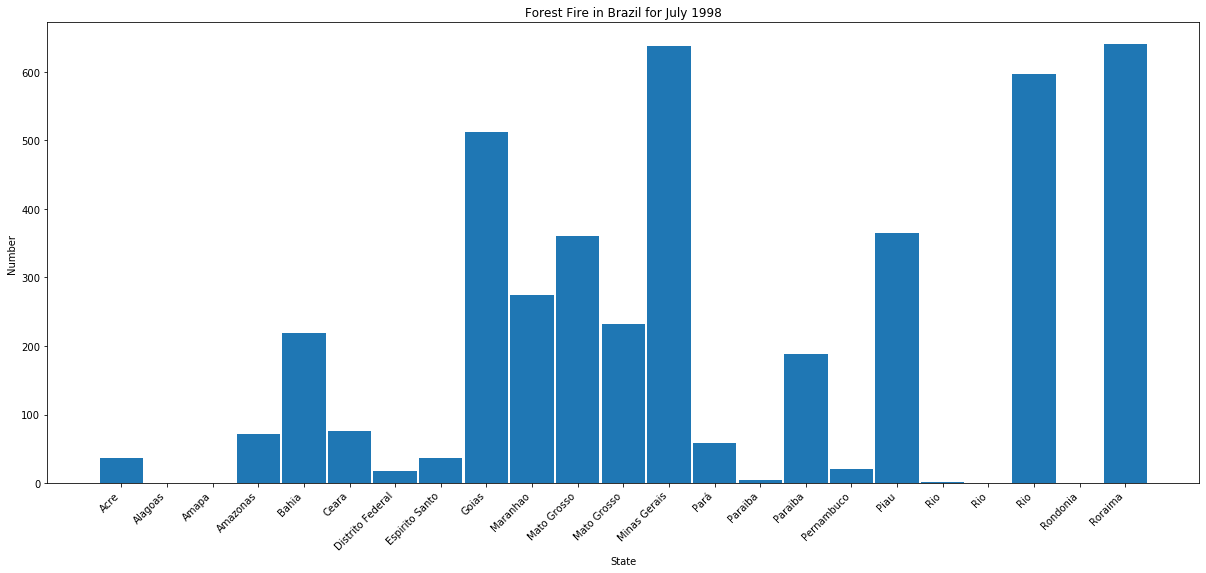

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.,0.1,0.8,0.8])

ax.bar(fire_data2['state'], fire_data2['number'], width=0.95)
ax.set_xticklabels(fire_data2['state'], rotation = 45, ha="right")

ax.set_title('Forest Fire in Brazil for July 1998')
ax.set_xlabel('State')
ax.set_ylabel('Number')

[Text(0, 0, 'Acre'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Amapa'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Ceara'),
 Text(0, 0, 'Distrito Federal'),
 Text(0, 0, 'Espirito Santo'),
 Text(0, 0, 'Goias'),
 Text(0, 0, 'Maranhao'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Paraiba'),
 Text(0, 0, 'Paraiba'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Piau'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rio'),
 Text(0, 0, 'Rondonia'),
 Text(0, 0, 'Roraima')]

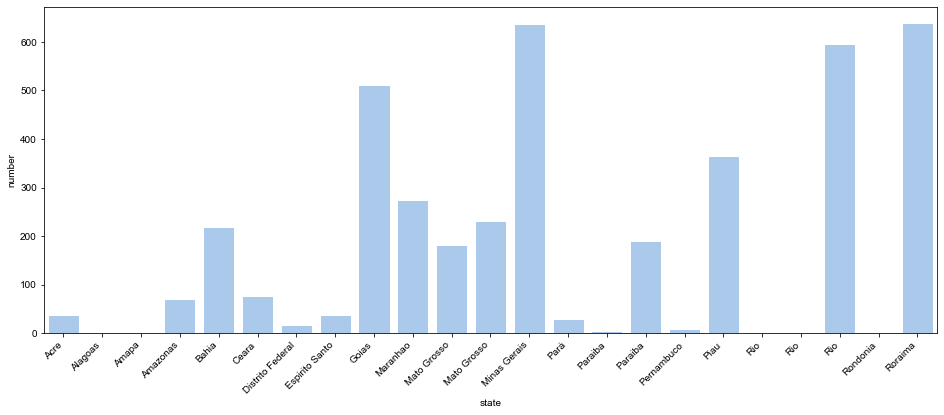

In [6]:
f, ax = plt.subplots(figsize=(16, 6))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

ax = sns.barplot(x='state', y='number', data=fire_data2, color="b", ci=None)
ax.set_xticklabels(fire_data2['state'], rotation = 45, ha="right")

In [27]:
states=fire_data['state'].unique()
print(states)

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


In [26]:
years=fire_data['year'].unique()
print(years)

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


In [23]:
fire_data_Acre=fire_data.loc[fire_data['state'] == 'Acre']

fire_data_Acre.shape[0]

239

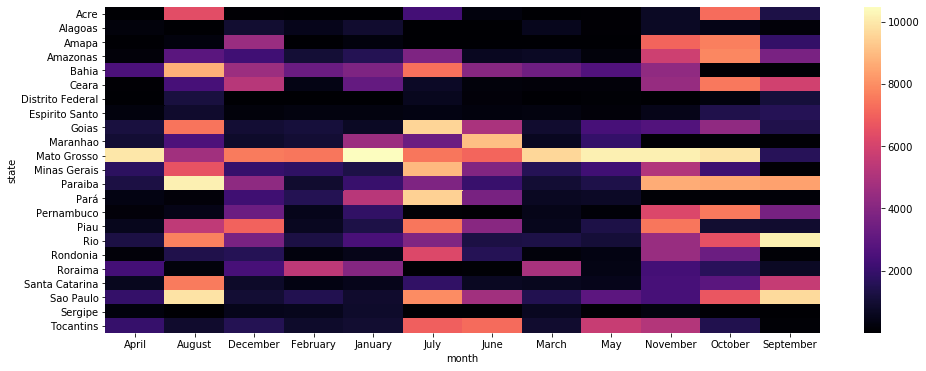

In [21]:
fire_data_pivot_mon=fire_data.pivot_table(values='number', index='state', columns='month', aggfunc=np.sum)

plt.figure(figsize=(16,6))
sns.heatmap(fire_data_pivot_mon, cmap='magma')

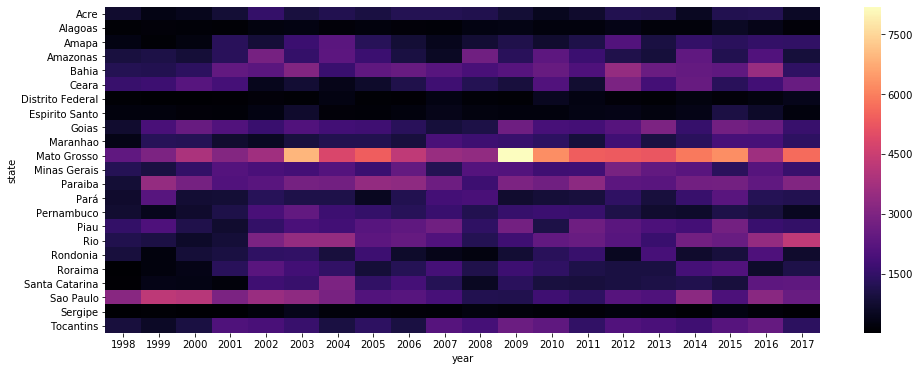

In [16]:
fire_data_pivot=fire_data.pivot_table(values='number', index='state', columns='year', aggfunc=np.sum)

plt.figure(figsize=(16,6))
sns.heatmap(fire_data_pivot, cmap='magma')

In [28]:
total=[]
state_total=0
data={}
years_data=[]
year_num=0

data['state']=states

for j in range(len(states)):   
    for i in range(len(fire_data.index)):
        if fire_data.at[i,'state'] == states[j]:
            state_total += fire_data.at[i,'number']

    total.append(state_total)
    state_total=0
    

for y in range(len(years)): 
    for s in range(len(states)):  
        for i in range(len(fire_data.index)):
            if (fire_data.at[i,'year'] == years[y]) and (fire_data.at[i,'state'] == states[s]):
                year_num += fire_data.at[i,'number']
                
        years_data.append(year_num)

        year_num=0
    
    data[years[y]]=years_data
    years_data=[]


data['total']=total

states_data = pd.DataFrame(data)
states_data

,state,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,total
0,Acre,730.000,333.000,434.000,828.000,1543.949,946.918,1183.978,984.451,1221.370,...,831.265,475.213,709.204,1185.996,1108.136,557.275,1191.325,1224.774,618.430,18464.030
1,Alagoas,86.000,172.000,123.000,86.000,258.000,299.000,159.000,217.000,161.000,...,325.000,222.000,232.000,352.000,208.000,190.000,590.000,400.000,159.000,4644.000
2,Amapa,278.000,101.000,253.000,1301.000,862.096,1652.000,2261.000,1271.000,817.000,...,1109.019,721.000,1100.000,2103.000,975.000,1490.000,1354.300,1493.161,1465.000,21831.576
3,Amazonas,946.000,1061.000,853.000,1297.000,2852.000,1524.268,2298.207,1657.128,997.640,...,1320.601,2324.508,1652.538,1110.641,905.217,2385.909,1189.994,2060.972,906.905,30650.129
4,Bahia,1224.687,1197.582,1378.635,2427.651,2280.700,3076.150,1644.409,2358.066,2509.085,...,2185.162,2515.010,2025.047,3454.937,2571.650,2457.367,2355.058,3520.234,1441.814,44746.226
5,Ceara,1612.014,1688.000,2211.000,1847.501,454.108,795.524,383.275,680.221,1109.173,...,930.640,2087.652,774.002,2937.104,1818.081,2512.000,1320.102,1788.638,2555.000,30428.063
6,Distrito Federal,103.000,46.000,48.000,64.000,149.000,96.000,279.000,92.000,76.000,...,92.000,505.000,273.000,173.000,101.000,251.000,172.000,242.000,410.000,3561.000
7,Espirito Santo,218.000,240.000,175.000,130.000,297.000,708.000,174.000,121.000,215.000,...,216.000,225.000,326.000,352.000,250.000,347.000,1031.000,654.000,234.000,6546.000
8,Goias,750.119,1910.096,2516.293,2065.863,1619.315,2078.845,1798.738,1709.058,1294.463,...,2682.000,1897.216,1808.872,2181.976,2979.000,1569.889,2762.103,2542.735,1581.131,37695.520
9,Maranhao,365.884,1276.442,1243.747,720.137,530.110,962.442,1197.185,1183.584,924.369,...,1589.799,1416.507,881.088,1748.875,976.228,1345.114,1870.295,1890.895,1413.532,25129.131


In [12]:
fire_data.loc[(fire_data['year'] == 1998)&(fire_data['state'] == 'Tocantins')]['number'].sum()

912.634

Text(0, 0.5, 'Number of forest fires')

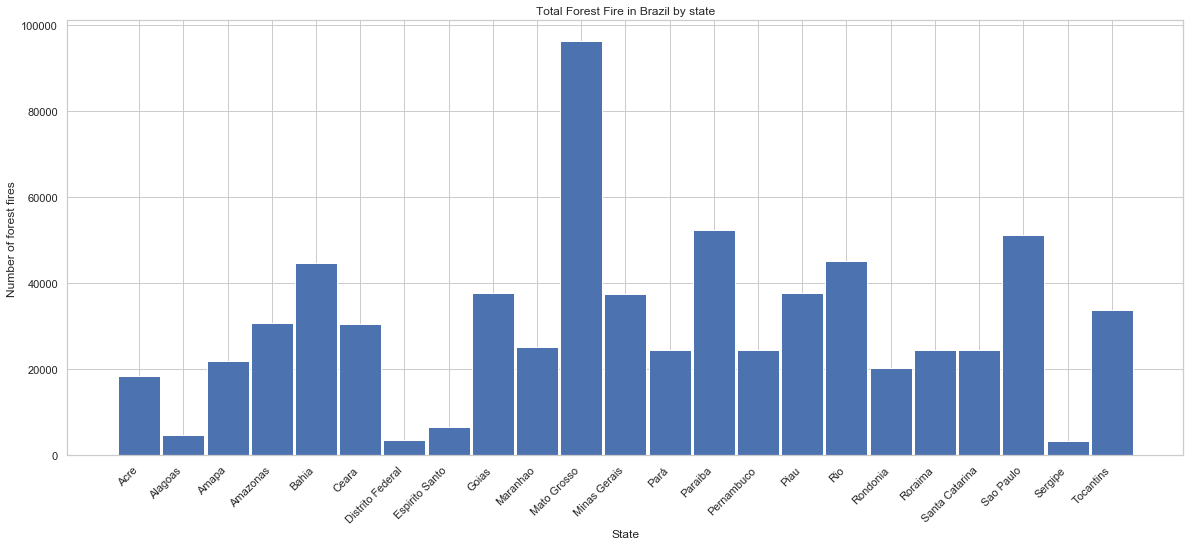

<Figure size 1152x432 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
plt.figure(figsize=(16,6))
plt.rcParams["figure.figsize"] = [20,8]

ax.bar(states_data['state'], states_data['total'], width=0.95)
ax.set_xticklabels(states_data['state'], rotation = 45, ha="right")

ax.set_title('Total Forest Fire in Brazil by state')
ax.set_xlabel('State')
ax.set_ylabel('Number of forest fires')

Text(0, 0.5, 'Number of forest fires')

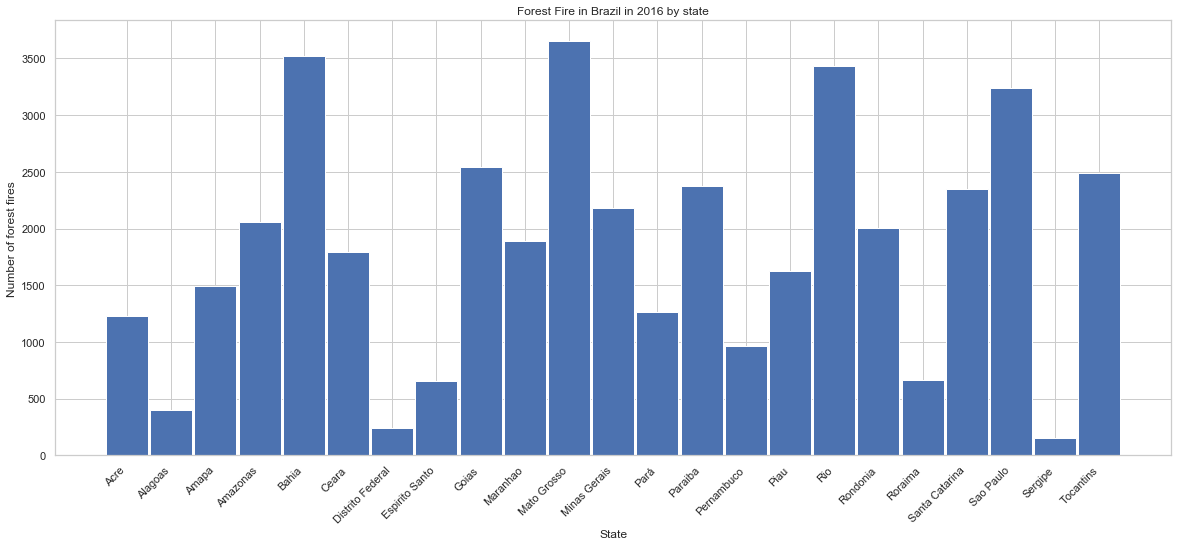

<Figure size 1152x432 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
plt.figure(figsize=(16,6))
plt.rcParams["figure.figsize"] = [20,8]

ax.bar(states_data['state'], states_data[2016], width=0.95)
ax.set_xticklabels(states_data['state'], rotation = 45, ha="right")

ax.set_title('Forest Fire in Brazil in 2016 by state')
ax.set_xlabel('State')
ax.set_ylabel('Number of forest fires')

In [28]:
a=states_data.loc[states_data['state'] == 'Acre'].values.tolist()
a=a[0][1:-1]
    
list_of_tuples = list(zip(years,a))
new_years_data = pd.DataFrame(list_of_tuples, columns = ['Year', 'State'])

new_years_data['Year']=new_years_data['Year'].astype('str')

(0, 2000)

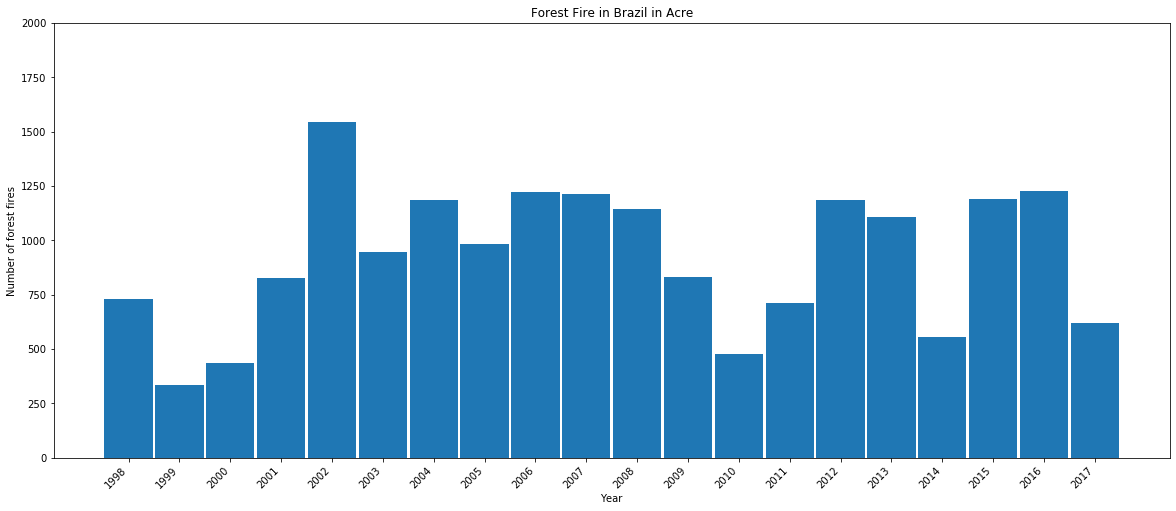

<Figure size 1152x432 with 0 Axes>

In [29]:
fig, ax = plt.subplots()
plt.figure(figsize=(16,6))
plt.rcParams["figure.figsize"] = [20,8]

ax.bar(new_years_data['Year'], new_years_data['State'], width=0.95)
ax.set_xticklabels(new_years_data['Year'], rotation = 45, ha="right")

ax.set_title('Forest Fire in Brazil in Acre')
ax.set_xlabel('Year')
ax.set_ylabel('Number of forest fires')
ax.set_ylim([0,2000])

In [30]:
states_data_years=states_data.transpose()

new_header = states_data_years.iloc[0]
states_data_years = states_data_years[1:]
states_data_years.columns = new_header

states_data_years.drop(states_data_years.tail(1).index,inplace=True)

states_data_years.reset_index(drop=False, inplace=True)
states_data_years['index']=states_data_years['index'].astype('str')
states_data_years=states_data_years.rename(columns={"index": "Year"}, errors="raise")
states_data_years

state,Year,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Paraiba,Pernambuco,Piau,Rio,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,1998,730,86,278,946,1224.69,1612.01,103,218,750.119,...,816,767,1493.58,1149,916.007,21,59,3196,20,912.634
1,1999,333,172,101,1061,1197.58,1688,46,240,1910.1,...,3437,463,2015.44,1030.11,208.922,220,364,4249.21,93,608.077
2,2000,434,123,253,853,1378.63,2211,48,175,2516.29,...,2804,691,1111.66,650,867.635,362,306,4128,17,993.554
3,2001,828,86,1301,1297,2427.65,1847.5,64,130,2065.86,...,2073,1080,730.76,857,1004.06,1309.11,200,2926,24,2039.08
4,2002,1543.95,258,862.096,2852,2280.7,454.108,149,297,1619.32,...,2248.66,1909,1503.69,2945,1452.09,2224,1715,3539,208,1918.88
5,2003,946.918,299,1652,1524.27,3076.15,795.524,96,708,2078.85,...,2796.57,2431,1963.98,3438.42,1464.91,1789.13,1608.85,3306,403,1582.31
6,2004,1183.98,159,2261,2298.21,1644.41,383.275,279,174,1798.74,...,2760.6,1683,1777.61,3437,920.27,1457,2955,2864,190,1003.21
7,2005,984.451,217,1271,1657.13,2358.07,680.221,92,121,1709.06,...,3427,1520,2211,2297,1678.2,860,1483,2123,200,1398.15
8,2006,1221.37,161,817,997.64,2509.09,1109.17,76,215,1294.46,...,3308,1268,2358.06,2501,680.192,1245,1855,2209,147,1002.43
9,2007,1213.08,128,440,589.601,2210.28,1711.62,274,382,888.322,...,2665,1631,2713.96,2067,395.641,1863,1230,1877,124,2159.83


Text(0, 0.5, 'Number of forest fires')

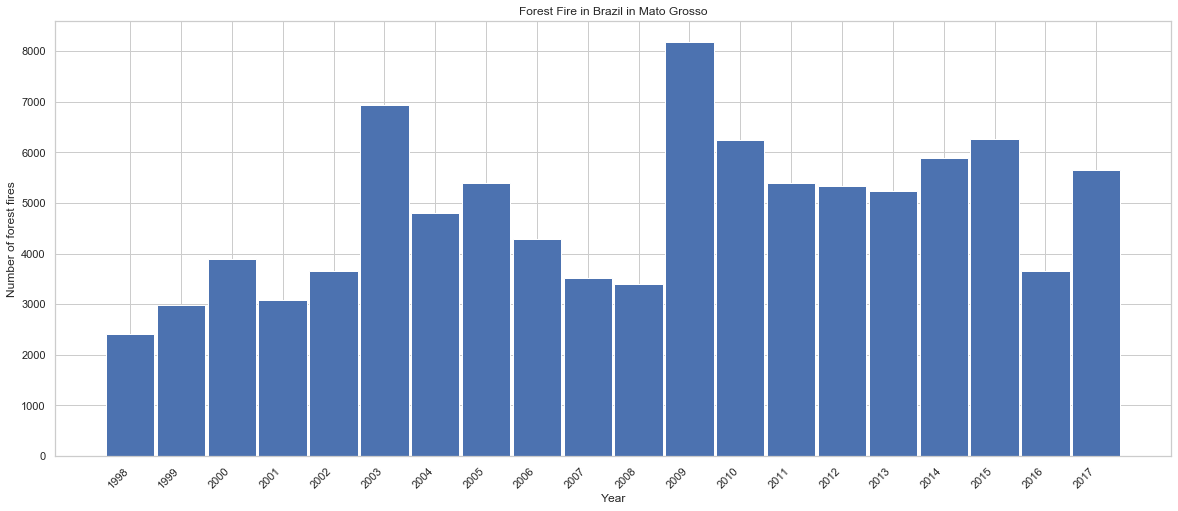

<Figure size 1152x432 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
plt.figure(figsize=(16,6))
plt.rcParams["figure.figsize"] = [20,8]

ax.bar(states_data_years['Year'], states_data_years['Mato Grosso'], width=0.95)
ax.set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax.set_title('Forest Fire in Brazil in Mato Grosso')
ax.set_xlabel('Year')
ax.set_ylabel('Number of forest fires')

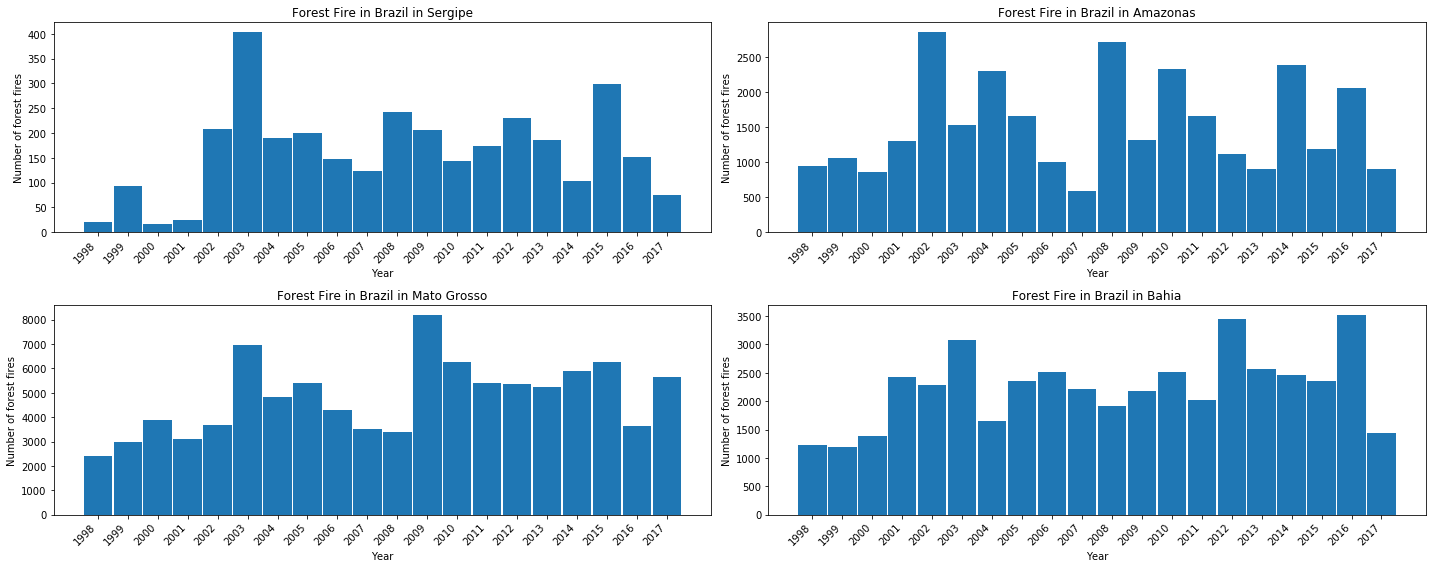

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].bar(states_data_years['Year'], states_data_years['Sergipe'], width=0.95)
ax[0][0].set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax[0][0].set_title('Forest Fire in Brazil in Sergipe')
ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('Number of forest fires')


ax[0][1].bar(states_data_years['Year'], states_data_years['Amazonas'], width=0.95)
ax[0][1].set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax[0][1].set_title('Forest Fire in Brazil in Amazonas')
ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Number of forest fires')


ax[1][0].bar(states_data_years['Year'], states_data_years['Mato Grosso'], width=0.95)
ax[1][0].set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax[1][0].set_title('Forest Fire in Brazil in Mato Grosso')
ax[1][0].set_xlabel('Year')
ax[1][0].set_ylabel('Number of forest fires')


ax[1][1].bar(states_data_years['Year'], states_data_years['Bahia'], width=0.95)
ax[1][1].set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax[1][1].set_title('Forest Fire in Brazil in Bahia')
ax[1][1].set_xlabel('Year')
ax[1][1].set_ylabel('Number of forest fires')

plt.tight_layout()

Text(0, 0.5, 'Number of forest fires')

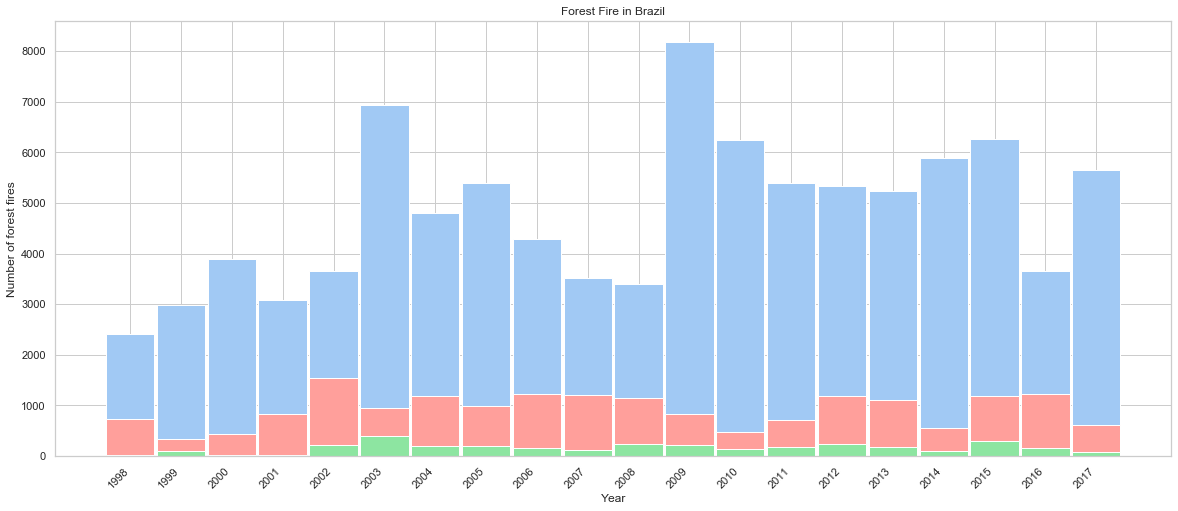

<Figure size 1152x432 with 0 Axes>

In [22]:
fig, ax = plt.subplots()
plt.figure(figsize=(16,6))
plt.rcParams["figure.figsize"] = [20,8]

ax.bar(states_data_years['Year'], states_data_years['Mato Grosso'], width=0.95, color='b', align='center')
ax.bar(states_data_years['Year'], states_data_years['Acre'], width=0.95, color='r', align='center')
ax.bar(states_data_years['Year'], states_data_years['Sergipe'], width=0.95, color='g', align='center')
ax.set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")

ax.set_title('Forest Fire in Brazil')
ax.set_xlabel('Year')
ax.set_ylabel('Number of forest fires')

[Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017')]

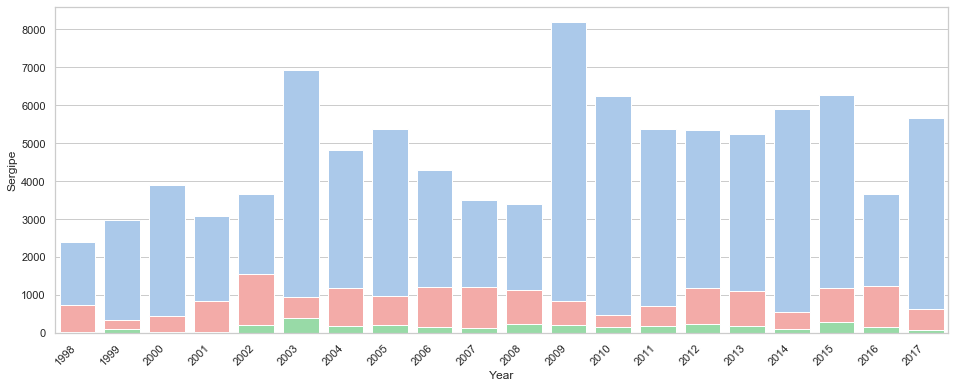

In [31]:
f, ax = plt.subplots(figsize=(16, 6))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

sns.barplot(x='Year', y='Mato Grosso', data=states_data_years, color="b", ci=None)
sns.barplot(x='Year', y='Acre', data=states_data_years, color="r", ci=None)
sns.barplot(x='Year', y='Sergipe', data=states_data_years, color="g", ci=None)
ax.set_xticklabels(states_data_years['Year'], rotation = 45, ha="right")